In [3]:
import geopandas as gpd

In [4]:
full_data = gpd.read_file("data/DEC_lands/DEC_lands.shp")

In [5]:
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [6]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [7]:
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [8]:
wild_lands = data.loc[data.CLASS.isin(["WILD FOREST", "WILDERNESS"])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [9]:
wild_lands.CLASS.value_counts()

CLASS
WILD FOREST    965
WILDERNESS      52
Name: count, dtype: int64

<Axes: >

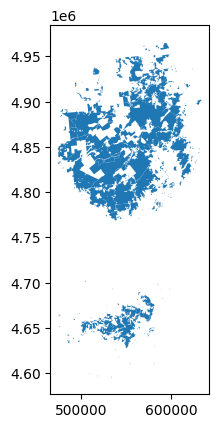

In [10]:
wild_lands.plot()

In [11]:
print(wild_lands.crs)

EPSG:26918


In [12]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.55 46...
3    POLYGON ((541716.775 4675243.268, 541217.58 46...
4    POLYGON ((583896.043 4909643.187, 583891.2 490...
Name: geometry, dtype: geometry

In [13]:
POI_data = gpd.read_file("data/DEC_pointsinterest/Decptsofinterest.shp")

In [14]:
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

In [15]:
campsites.shape

(1843, 12)

dataset.shape # (rows, columns)

shape[0]  # number of rows
shape[1]  # number of columns

In [16]:
if campsites.shape[0] > 0:
    print("good")
else:
    raise

good


In [17]:
roads_trails = gpd.read_file("data/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()


In [18]:
counties = gpd.read_file("data/NY_county_boundaries/NY_county_boundaries.shp")

- data.plot signature
- figsize : corresponds to the size of the figure in inches
- ax : the axes to plot on, if not provided, a new figure and axes will be
- edgecolor : color of the edge of the figure
- color : color of the figure
- zorder : the order in which the figure is drawn, higher values are drawn on top of lower values
- alpha : transparency of the figure, 0 is fully transparent, 1 is fully opaque

<Axes: >

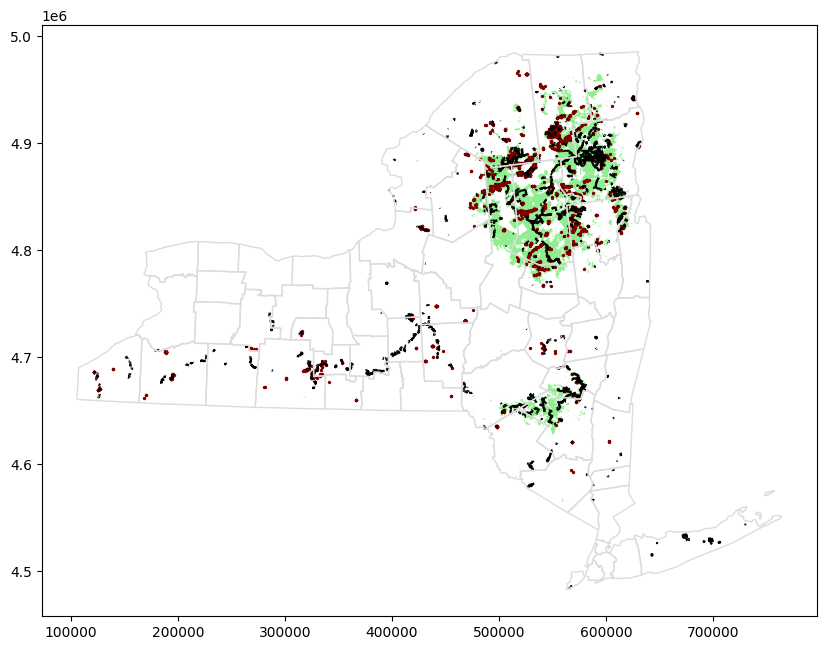

In [19]:
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

## TP - 1

In [20]:
world_loans = gpd.read_file("data/kiva_loans/kiva_loans.shp")

In [21]:
print(world_loans.crs)

None


<Axes: >

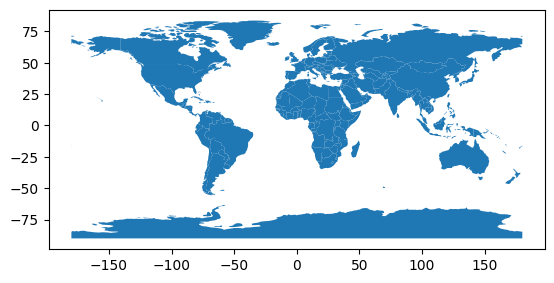

In [66]:
world = gpd.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot()

<Axes: >

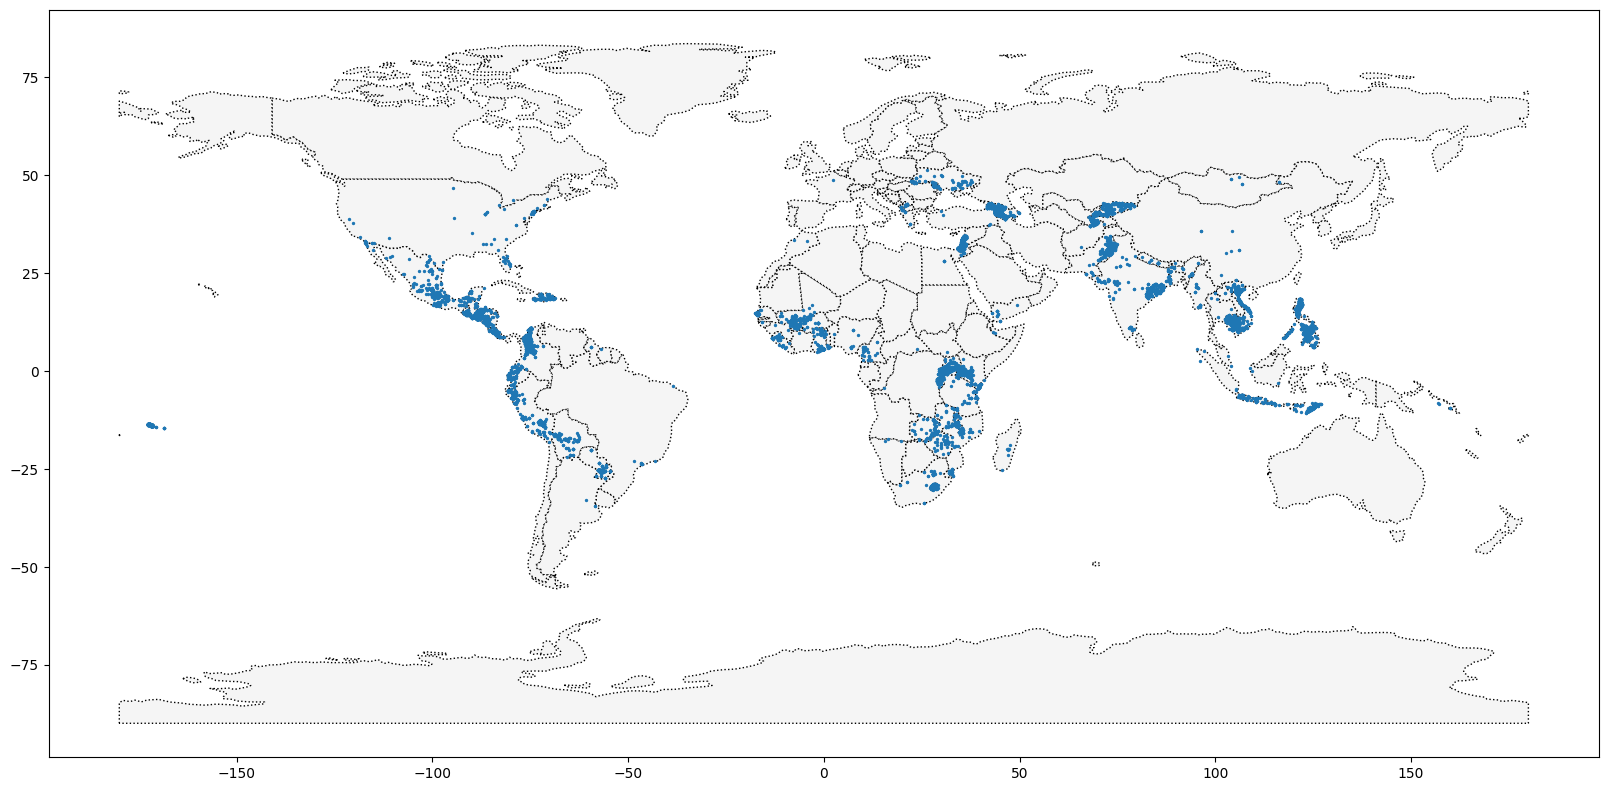

In [23]:
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

In [24]:
PHL = gpd.read_file("data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.4669 4.58718, 119.46653 4...."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.244, 126.45407 8.2..."


In [25]:
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()

<Axes: >

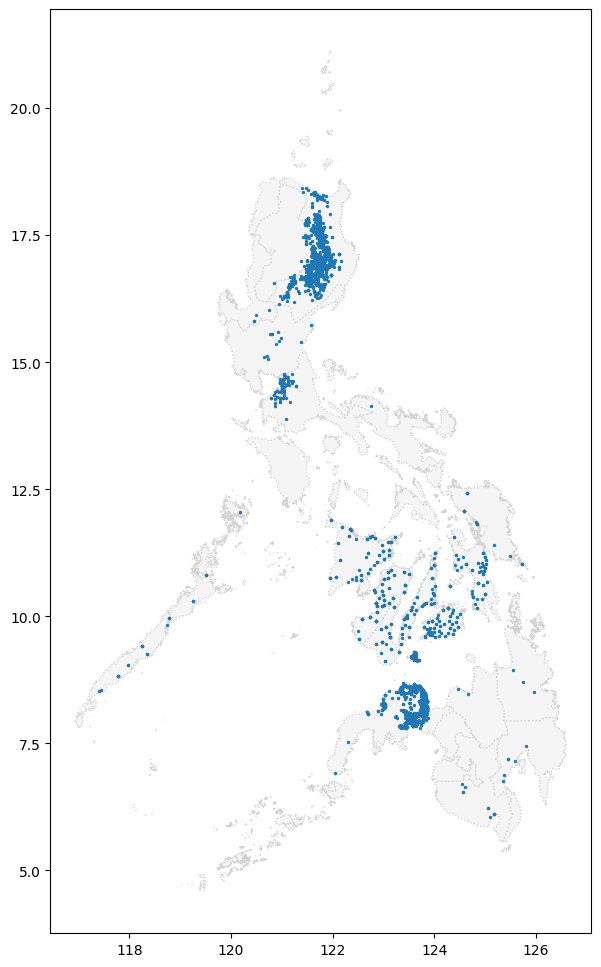

In [26]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)

## SYSTEME DE COORDONNÉES

In [44]:
regions = gpd.read_file("data/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [45]:
print(regions.crs)

EPSG:32630


In [46]:
regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


In [29]:
import pandas as pd

In [30]:
facilities_df = pd.read_csv("data/ghana/health_facilities.csv")

In [31]:
facilities_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


- Explaining of gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))
- facilities_df is a DataFrame containing the longitude and latitude of facilities.
- gpd.GeoDataFrame creates a GeoDataFrame from the facilities_df DataFrame, using the
- ``gpd.points_from_xy`` function to convert the longitude and latitude into geometric points.
- This allows for spatial operations and visualizations to be performed on the data.

In [32]:
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

In [33]:
facilities.crs = {'init': 'epsg:4326'}

/Users/turing/Documents/Learn/geopython-form/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [34]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [41]:
new_facilities = facilities.to_crs(epsg=32630)

In [43]:
new_facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.49 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.49 756478.812)


<Axes: >

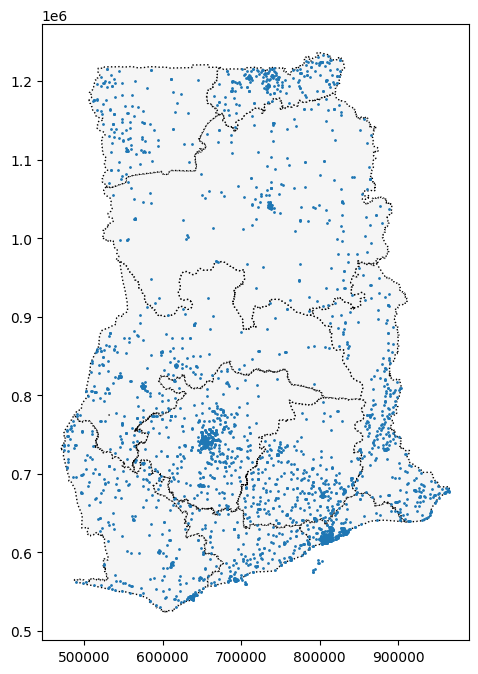

In [42]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
new_facilities.plot(markersize=1, ax=ax)

In [37]:
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.49 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.49 756478.812)


In [47]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()


,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.2942, -..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [39]:
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [49]:
print(regions.crs)

EPSG:32630


In [50]:
regions.geometry.area

0    2.437902e+10
1    4.009817e+10
2    9.665627e+09
3    1.898763e+10
4    3.706511e+09
5    6.983058e+10
6    8.629358e+09
7    1.902208e+10
8    2.094830e+10
9    2.431732e+10
dtype: float64

 - area en m2
 - Area s'utilise sur les polygones
 - si l'on avait des lignes, on aurait utilisé length

In [52]:
valeur = "BONJOUR"
nom = "FRANCK"
print(f"{valeur} {nom}")

BONJOUR FRANCK


In [ ]:
regions.loc[:, "AREA"] = regions.geometry.area / 10**6 # km2

print(f"Area of Ghana: {regions.AREA.sum()} square kilometers")

print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


# TP 2

In [53]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

In [62]:
birds_df = pd.read_csv("data/purple_martin.csv")
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [63]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))
birds.crs = {'init' :'epsg:4326'}

/Users/turing/Documents/Learn/geopython-form/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [64]:
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.2435 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.7239)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [78]:
world.CONTINENT.value_counts()

CONTINENT
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [ ]:
americas = world.loc[world.CONTINENT.isin(['North America', 'South America'])]
americas.head()

In [88]:
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.2435 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.7239)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


<Axes: >

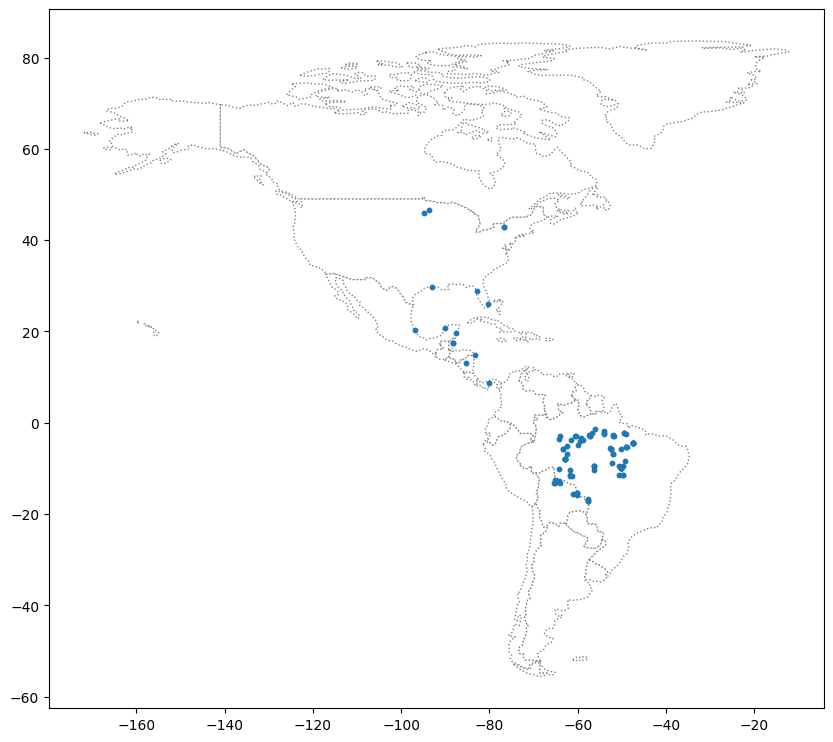

In [87]:
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)

In [89]:
path_df = birds.groupby("tag-local-identifier")["geometry"].apply(lambda x: LineString(x)).reset_index()

In [91]:
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init': 'epsg:4326'}

In [92]:
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

/Users/turing/Documents/Learn/geopython-form/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [93]:
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99208)
4,30275,POINT (-76.78213 42.99207)


In [94]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}

/Users/turing/Documents/Learn/geopython-form/.venv/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

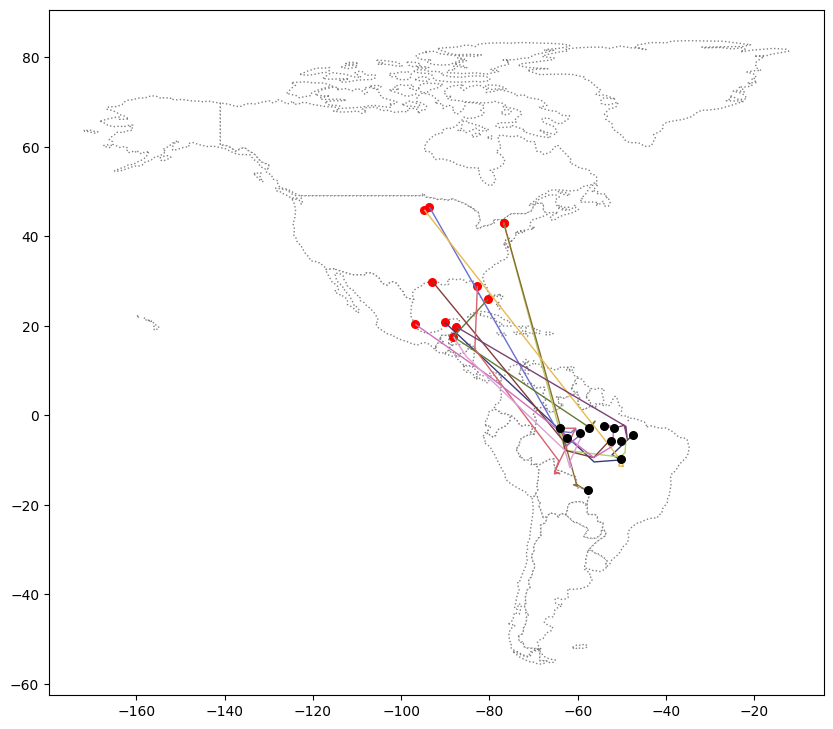

In [95]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

In [96]:
protected_areas = gpd.read_file("data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")

In [98]:
south_america = americas.loc[americas['CONTINENT']=='South America']

<Axes: >

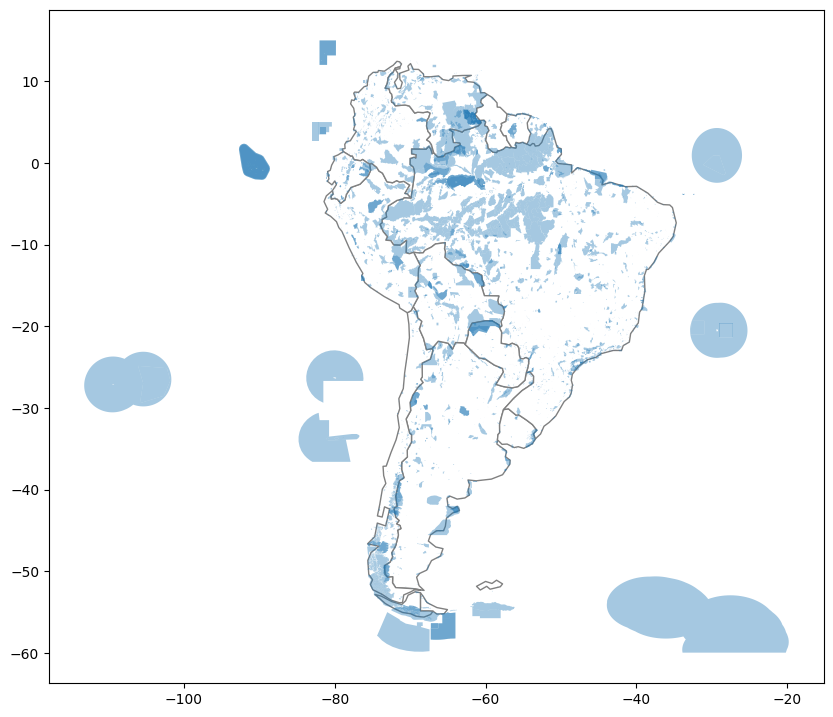

In [99]:
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas.plot(ax=ax, alpha=0.4)